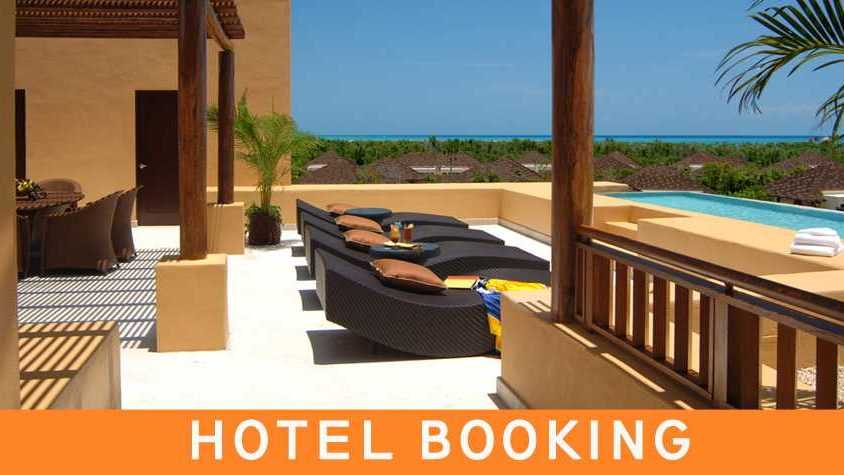

# <font color=blue>Dataset</font>

### <font color=green>  This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data. We will perform exploratory data analysis with python to get insight from the data.

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing neccesary libraries.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)

# <font color=blue>1. Reading and Inspection</font>

In [ ]:

hotel= pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")
hotel.head()


In [ ]:

print(hotel.shape)

In [ ]:
# let's look at the statistical aspects of the dataframes
hotel.describe()

In [ ]:
#checking datatypes
hotel.info()

### The dataset have **<font color='green'>32 variables (Continuous and Categorical)</font>** with one identified dependent variable (categorical), which is 'is_cancelled.


In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()


* ###  <font color=green>We can see that the percent of City hotel is more compared to Resort hotel. 
* ###   <font color=green>Resort Hotel tend to be on the expensive side and most people will just stick with city hotel.


# <font color=blue>2. Cleaning the Data</font>

In [ ]:
#Checking the missing values in the columns

hotel.isnull().sum()

In [ ]:
#Column-wise null percentage

print(round(100*(hotel.isnull().sum()/len(hotel.index)),2))


### The dataset **<font color='green'>contains Missing values </font>**.


* # <font color=blue>Drop unecessary columns: </font>

### **<font color='green'>Lets drop columns with high missing values</font>**.

In [ ]:
hotel=hotel.drop(['agent','company'],axis=1)


### <font color=green>Country has 488 rows with the NaN values. 488 rows out of 119390 is negligible hence we will just remove.</font>

In [ ]:
hotel = hotel.dropna(axis = 0)

In [ ]:
hotel.isnull().sum()

### <font color=green>No more missing values in the data</font>

### Lets Rename the columns for better readability

In [ ]:
hotel.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

## <font color=blue>Identify Continuous and Categorical Variables</font>

In [ ]:
def var(hotel):
    unique_list = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(hotel.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      | 
                                   (unique_list.name=='Country')  | 
                                   (unique_list.name=='Agent')                                     
                                  ])
    con_var = total_var - cat_var
    
    return cat_var, con_var 


cat_var, con_var = var(hotel)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

* ## <font color=blue>Checking the Outliers</font>

In [ ]:
# Creating a boxplot for Outlier detection
features = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults','Children', 'Babies','ADR']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(hotel[features])
    n+=1
    plt.tight_layout()

### The dataset **<font color='green'>contains Outliers</font>**.

In [ ]:
#Checking outliers in continuous variables
hotel[con_var].describe()

- ### List of Continuous Variables with Outliers identified through **<font color='green'>Summary Statistics</font>** are:
    - LeadTime
    - WaitingDays
    - WeekendStay
    - Adults
    - PrevBook
    - PrevCancel
    - WeekStay
    
 - ### List of Continuous Variables which should be Categorical
    - PrevBook
    - PrevCancel

* > >  ## <font color=blue>Imputing the Outliers (for Continuous Variable)</font>

In [ ]:
hotel.loc[hotel.LeadTime      > 500,'LeadTime'     ]=500
hotel.loc[hotel.WaitingDays   >   0,'WaitingDays'  ]=  1
hotel.loc[hotel.WeekendStay   >=  5,'WeekendStay'  ]=  5
hotel.loc[hotel.Adults        >   4,'Adults'       ]=  4
hotel.loc[hotel.PrevBook      >   0,'PrevBook'     ]=  1
hotel.loc[hotel.PrevCancel    >   0,'PrevCancel'   ]=  1
hotel.loc[hotel.WeekStay      >  10,'WeekStay'     ]= 10
hotel.loc[hotel.ChangeBooking >   5,'ChangeBooking']=  5

cat_var = set(list(cat_var) + ['PrevBook','PrevCancel'])
con_var = set(hotel.columns) - cat_var

hotel[con_var].describe()

In [ ]:
#outliers in categorical variables
hotel[cat_var].describe()

In [ ]:
hotel.loc[hotel.Babies    > 8,'Babies']    = 0
hotel.loc[hotel.ParkSpace > 5,'ParkSpace'] = 0
hotel.loc[hotel.Children  > 8,'Children']  = 0

hotel[cat_var].describe()

### <font color=green>Now we have treated the outliers</font>

# <font color=blue>3. Data Preparation</font>

In [ ]:
#Lets combine children and babies together as kids
hotel['Kids'] = hotel.Children + hotel.Babies

#Combine total mumbers by adding kids and adults
hotel['total_members'] = hotel.Kids + hotel.Adults

In [ ]:
#convert the datatypes to string
hotel['ArrivingYear'] = hotel['ArrivingYear'].astype('str')
hotel['ArrivingMonth'] = hotel['ArrivingMonth'].astype('str')
hotel['ArrivingDate'] = hotel['ArrivingDate'].astype('str')

hotel['Canceled'] = hotel['Canceled'].astype('str')
hotel['RepeatGuest'] = hotel['RepeatGuest'].astype('str')


In [ ]:
# Lets convert arrival date to datetime
hotel['Arrival Date'] = hotel['ArrivingDate'] + '-' + hotel['ArrivingMonth'] + '-' + hotel['ArrivingYear']
hotel['Arrival Date'] = pd.to_datetime(hotel['Arrival Date'], errors='coerce')

In [ ]:
confirmed_bookings = hotel[hotel.Canceled=='0']

In [ ]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = hotel['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

# <font color=blue>3. EDA</font>

* ## <font color=Red>Cancelations</font>

In [ ]:
print('Total Bookings canceled')
print('-'*50)
print(hotel.Canceled.value_counts())
print('-'*50)
print('*'*75)
print('Cancelation percentage in both hotels ')
print('-'*50)
print(hotel.Canceled.value_counts(normalize=True))


### <font color=purple>44153 bookings were canceled which is around 37%</font>

* ## <font color=red>Country

In [ ]:
hotel.Country.value_counts(normalize=True)

### <font color=purple>Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).

* > # <font color=red>Month

In [ ]:
hotel.ArrivingMonth.value_counts(normalize=True)

### <font color=purple>August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.

* ## <font color=red>Market Segment

In [ ]:
hotel.Segment.value_counts(normalize=True)

### <font color=purple>Around 47% of bookings are made via Online Travel Agents, almost 20% of bookings are made via Offline Travel Agents and less than 20% are Direct bookings without any other agents.

* ## <font color=red>Year

In [ ]:
hotel.ArrivingYear.value_counts(normalize=True)

### <font color=purple>47% bookings were done in 2016, 34% in 2017 and  18 percent in 2015.. We can see increasing tendency in bookings year wise

## <font color=red>Meal

In [ ]:
hotel.Meal.value_counts(normalize=True)

### <font color=purple>Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.2%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board).

## <font color=red>Customer Type

In [ ]:
hotel.CustomerType.value_counts(normalize=True)

### <font color=purple>Transient type of customers are the more around 75%

In [ ]:
hotel.Reservation.value_counts(normalize=True)

### <font color=purple>We can see 63% visitors checked out and 36% bookings were canceled

# <font color=blue>4. Data Visualization</font>

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear', y='LeadTime',hue='Canceled', data= hotel, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

### <font color=purple>For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

In [ ]:
#Lets see the correlation
plt.figure(figsize=(12,8))
sns.heatmap(hotel.corr(),annot=True,cmap='RdYlGn')

* ### <font color=blue>Canceled

In [ ]:
#Canceled=1, Not canceled= 0
canceled_data = hotel['Canceled']
sns.countplot(canceled_data, palette='husl')

plt.show()

### <font color=green>Majority of bookings were not canceled, still some half of the bookings were canceled</font>

In [ ]:
cols = ['gold', 'lightcoral']
hotel['Canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

### According to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel.

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Hotel',hue="Canceled", data=hotel,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

* ### <font color=green>Most bookings were in city hotel</font>
* ### <font color=green>Cancelations in Resort hotel is less compared to city hotel</font>

* ### <font color=blue>Arrivals in month and year

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear',hue='Hotel', data=hotel,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'ArrivingMonth')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

* ### <font color=green>We can see most of the bookings were in the year 2016 and bookings were doine in City hotel</font>
* ### <font color=green>Most bookings were done in the month of May,June, July, August</font>

* ### <font color=blue>Arrivarl Date

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(data = hotel, x = 'ArrivingDate', hue='Hotel', palette='Paired')
plt.show()

* ### <font color=green>Month end day has very less arrivals</font>
* ### <font color=green>Bookings are more in City hotel</font>

* ### <font color=blue>Weekend Stay

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekendStay',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekendStay', hue='Canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

* ### <font color=green>In the first graph we can see that most of the weekend nights were booked in City Hotel</font>
* ### <font color=green>Second plot shows most of weekend nights which were booked were not canceled</font>

* ### <font color=blue>WeekStay

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekStay',hue='Hotel', data=hotel, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekStay', hue='Canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

* ### <font color=green>Weekday night stays were more in City Hotel</font>
* ### <font color=green>Less cancelations were observed</font>

* ### <font color=blue>Adults

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Adults',hue='Hotel', data=hotel, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Adults', hue='Canceled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

* ### <font color=green>Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings</font>


* ### <font color=blue>Children

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Children',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Children', hue='Canceled', palette='Set2')
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

* ### <font color=blue>Babies

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Babies',hue='Hotel', data=hotel, palette='coolwarm')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Babies', hue='Canceled', palette='Set1_r')
plt.title('Babies vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()

* ### <font color=green>Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel</font>
* ### <font color=green>visitors who had 1 or 2 children also preferred city hotel</font>



* ### <font color=blue>Country

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
country_visitors = hotel[hotel['Canceled'] == '0'].groupby(['Country']).size().reset_index(name = 'count')


import plotly.express as px

px.choropleth(country_visitors,
                    locations = "Country",
                    color= "count" ,
                    hover_name= "Country", # column to add to hover information
                    color_continuous_scale="Viridis",
                    title="Home country of visitors")

* ### <font color=green>More visitors are from western europe, namely France,UK and Portugal being the highest.
 

* ### <font color=blue>Market</font>

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment', data=hotel, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'DistChannel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()

* ### <font color=green>Majority DIstribution channels and Market segment were Travel agencies wither offline/online. So better focus more on this
 

* ### <font color=blue>Deposit

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data = hotel, x = 'DepositType',hue='Hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

* ### <font color=green>There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to cancel the bookings

* ### <font color=blue>Repeat guest

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data = hotel, x = 'RepeatGuest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

* ### <font color=green>Low number of repeated guests.
* ### <font color=green> A need to target repeated guests since they have booked before. **

# <font color=blue>Looking into prices per month per hotel
- average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
    
- average daily rate per person =  $ \frac{ADR}{Adults + Children}$
    
- We will need to find out average daily rate per person

In [ ]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
hotel['adr_pp'] = hotel['ADR'] / (hotel['Adults'] + hotel['Children']) 
actual_guests = hotel.loc[hotel["Canceled"] == '0']
actual_guests['price'] = actual_guests['ADR'] * (actual_guests['WeekendStay'] + actual_guests['WeekStay'])
sns.lineplot(data = actual_guests, x = 'ArrivingMonth', y = 'price', hue = 'Hotel')
plt.show()

-  ### <font color=green>Prices of resort hotel are much higher. 
* ### <font color=green> Prices of city hotel do not fluctuate that much. 

* ### <font color=blue>ADR: Average Daily Rate

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR', hue='Hotel', data= hotel)
plt.show()

-   ### <font color=green>For Resort Hotel, ADR is more expensive during July, August & September and for City Hotel, ADR is slightly more during March, April & May.

# <font color=purple>Summary

-   ### <font color=green>Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
-   ### <font color=green>We also realise that the high rate of cancellations can be due high no deposit policies. 
-   ### <font color=green>We should also target months between May to Aug. Those are peak months due to the summer period.
-   ### <font color=green>Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
-   ### <font color=green>Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.   

# <font color=purple> Strategies to Counter High Cancellations at the Hotel

-   ### <font color=green>Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.
-   ### <font color=green>Encourage Direct bookings by offering special discounts
-   ### <font color=green>Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.